In [18]:
import pandas as pd
import numpy as np
import os
import gzip, pickle
import re

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [19]:
##Carrega informações do fundos
filename='itau_phoenix.pkl'

with gzip.open(filename,'rb') as fp:
    my_shelf = pickle.load(fp)

for k in my_shelf.keys():
    globals()[k] = my_shelf[k]
carteira = carteira.query("FILE != 'PL'")

# Constroi a matriz de pesos da carteira
linhas são datas, colunas são ativos

In [20]:
#coluna de id
pivot_cols = carteira.CD_ATIVO\
            .fillna(carteira.CD_ISIN)\
            .fillna(carteira.CD_ATIVO_BV_MERC)\
            .fillna(carteira[carteira.FILE.str.contains('BLC_8') & carteira.TP_ATIVO.str.contains("Ação|Ações|Opção|Opcões|Outr|Recibo|BDR", flags=re.IGNORECASE)].DS_ATIVO.str.extract(r'([A-Z]{0,5}\d+)', expand=False))\
            .fillna(carteira[carteira.FILE.str.contains('BLC_8')].DS_ATIVO.str.extract(r'(BR[A-Z0-9]+)', expand=False))\
            .fillna(carteira[carteira.DS_ATIVO.str.lower().isin(['disponibilidades', 'valores a pagar', 'valores a receber'])].DS_ATIVO.str.upper()) \
            .fillna(carteira[carteira.TP_ATIVO == 'Título público federal'].DS_ATIVO.str.extract(r'(\d{6})', expand=False))
pesos = carteira.pivot_table(index='DT_COMPTC', columns=pivot_cols, values='peso', aggfunc='sum')

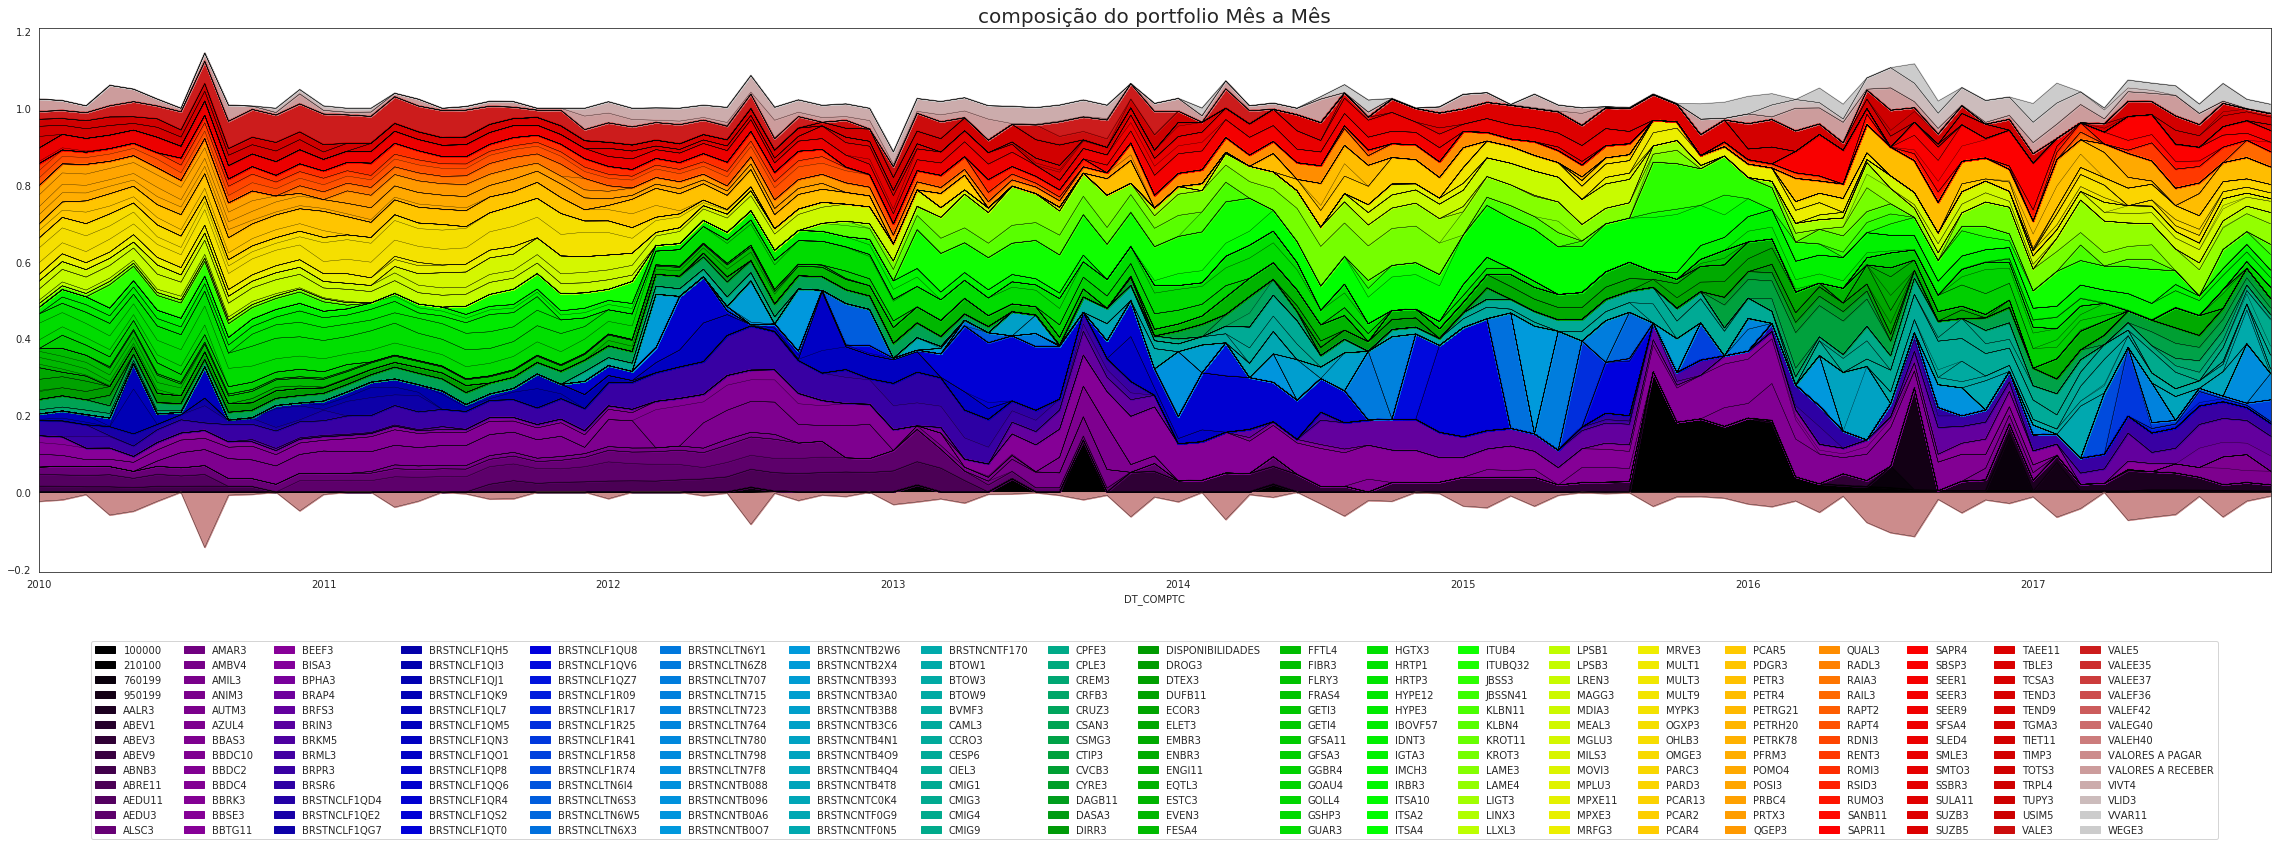

In [21]:
ax = pesos.plot.area(figsize=(40,10), cmap='nipy_spectral')
pesos.plot(stacked=True, ax=ax, color='k', lw=0.3, legend=False)
h,l = ax.get_legend_handles_labels()
ax.legend(h[int(len(h)/2):], l[int(len(l)/2):], ncol=20, bbox_to_anchor=(0.5,-0.5), loc=8)
ax.set_title("composição do portfolio Mês a Mês", fontsize=20);

# Calcula os retornos dos ativos e dos títulos

In [22]:
retornos_acoes = acoes_qry.pivot_table(index='DATA', columns='CODNEG', values='PREULT').div(100).pct_change()
retornos_titulos = titulos_qry.pivot_table(index='DT_MOV', columns='CODISI', values='VALOR_PAR').pct_change()

In [23]:
print('Açoes e Opções')
retornos_acoes.describe().round(4)

Açoes e Opções


CODNEG,AALR3,ABEV1,ABEV3,ABEV9,ABNB3,ABRE11,AEDU11,AEDU3,ALSC3,AMAR3,...,VALEE35,VALEE37,VALEF36,VALEF42,VALEG40,VALEH40,VIVT4,VLID3,VVAR11,WEGE3
count,288.0000,908.0000,1020.0000,886.0000,2187.0000,1591.0000,2187.0000,1749.0000,1960.0000,1859.0000,...,2148.0000,1415.0000,2169.0000,2169.0000,2144.0000,2136.000,1540.0000,1766.0000,997.0000,2187.0000
mean,-0.0007,0.0017,0.0003,-0.0000,0.0003,0.0005,0.0006,0.0000,0.0005,-0.0003,...,0.2021,0.1058,0.7865,0.9623,1.1860,0.473,0.0001,0.0002,0.0006,0.0006
std,0.0191,0.0522,0.0134,0.0019,0.0070,0.0133,0.0123,0.0240,0.0186,0.0247,...,5.2421,3.8351,32.2143,23.4672,30.0248,15.752,0.0156,0.0196,0.0340,0.0214
min,-0.0804,-0.3333,-0.0551,-0.0201,-0.0558,-0.0938,-0.0763,-0.6653,-0.1559,-0.1635,...,-0.6066,-0.8333,-0.9130,-0.8763,-0.9785,-0.822,-0.0692,-0.1048,-0.1291,-0.4921
25%,-0.0099,0.0000,-0.0072,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0096,-0.0139,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,-0.0091,-0.0106,-0.0182,-0.0094
50%,-0.0009,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0002,0.0000,-0.0008,0.0000
75%,0.0068,0.0000,0.0084,0.0000,0.0000,0.0000,0.0000,0.0000,0.0105,0.0125,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0098,0.0098,0.0177,0.0109
max,0.1027,1.2500,0.0582,0.0246,0.0653,0.1164,0.1053,0.1136,0.1600,0.1411,...,164.0000,144.0000,1489.0000,760.0000,889.0000,599.000,0.0907,0.1171,0.1649,0.0834


In [24]:
print("Títulos Públicos")
retornos_titulos.describe()

Títulos Públicos


CODISI,000000000000,BRSTNCLF1Q59,BRSTNCLF1QB8,BRSTNCLF1QC6,BRSTNCLF1QD4,BRSTNCLF1QE2,BRSTNCLF1QF9,BRSTNCLF1QG7,BRSTNCLF1QH5,BRSTNCLF1QI3,...,BRSTNCNTF0H7,BRSTNCNTF0I5,BRSTNCNTF0J3,BRSTNCNTF0N5,BRSTNCNTF0O3,BRSTNCNTF139,BRSTNCNTF147,BRSTNCNTF162,BRSTNCNTF170,BRSTNCNTF1P8
count,2126.0,2467.000000,2467.000000,2467.000000,3284.000000,3153.000000,2467.000000,3121.000000,3109.000000,3086.000000,...,2467.0,2467.0,2466.0,2230.0,2085.0,1748.0,1705.0,1499.0,1242.0,736.0
mean,0.0,0.000002,0.000021,0.000029,0.000152,0.000163,0.000012,0.000168,0.000177,0.000183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.000033,0.000087,0.000100,0.000278,0.000242,0.000070,0.000405,0.000508,0.000374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.000000,0.000000,0.000000,0.000384,0.000402,0.000000,0.000384,0.000329,0.000384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.000473,0.000473,0.000473,0.006079,0.002105,0.000473,0.012166,0.010751,0.005905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Análise PCA dos retornos dos ativos

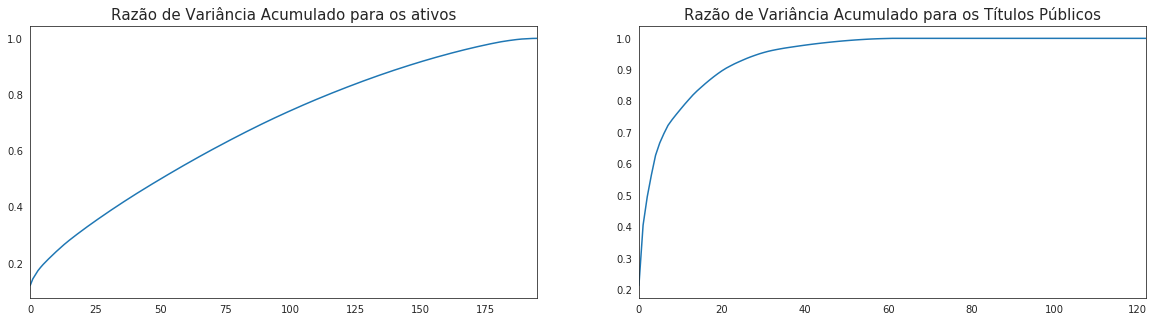

In [25]:
fig, (axe, axd) = plt.subplots(ncols=2, figsize=(20,5))
std_stock_returns = StandardScaler().fit_transform(retornos_acoes.fillna(0))
pd.Series(PCA().fit(std_stock_returns).explained_variance_ratio_).cumsum().plot(ax=axe)
axe.set_title('Razão de Variância Acumulado para os ativos', fontsize=15)

std_securities_returns = StandardScaler().fit_transform(retornos_titulos.fillna(0))
pd.Series(PCA().fit(std_securities_returns).explained_variance_ratio_).cumsum().plot(ax=axd)
axd.set_title('Razão de Variância Acumulado para os Títulos Públicos', fontsize=15);

### Cria uma proxy para o índice futuro

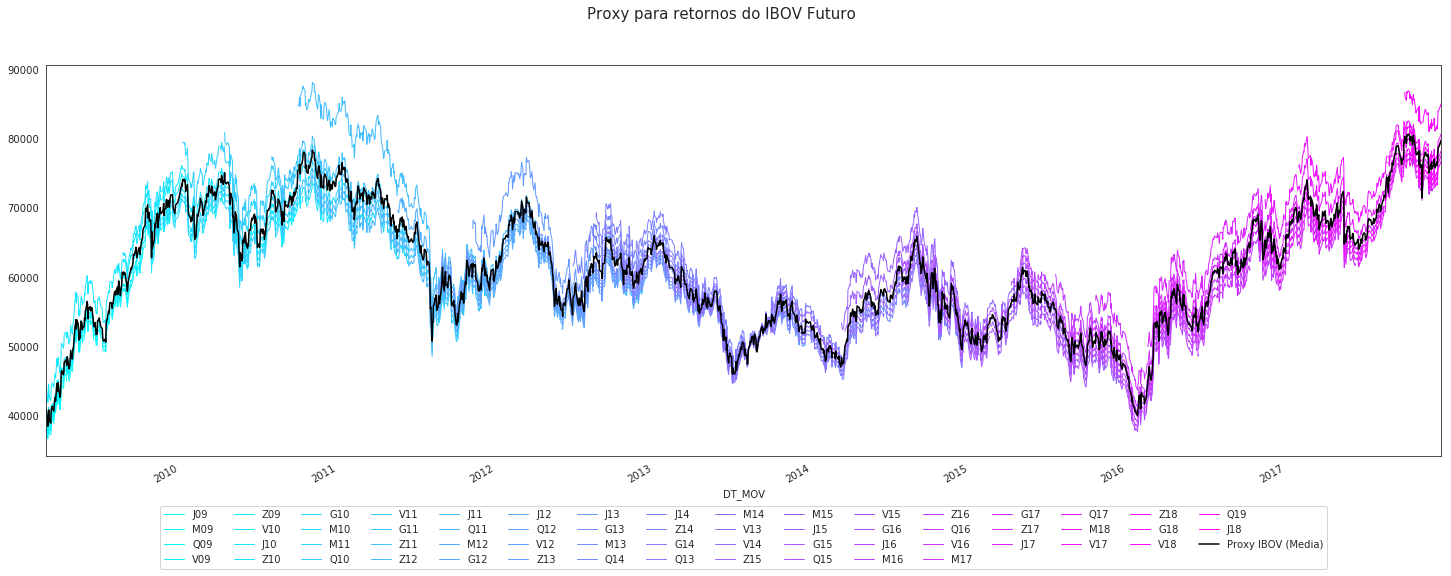

In [26]:
q = futuros_qry.MERCADORIA.str.contains('IND')
grp = futuros_qry.loc[q].groupby(['DT_MOV','ANO_VENCIMENTO','MES_VENCIMENTO'])['PRECO_ATUAL']
df = grp.mean().unstack([2,1])
df.columns = [i+j for i, j in df.columns]
df.plot(figsize=(25,8), cmap='cool', lw=1)
IBOV_FUT = grp.mean().groupby(level='DT_MOV').mean().rename('IBOV_FUT')
IBOV_FUT.plot(color='k', label='Proxy IBOV (Media)', ls='-')
plt.legend(ncol=16, loc=8, bbox_to_anchor=(0.5,-0.3))
plt.suptitle("Proxy para retornos do IBOV Futuro",fontsize=15);

### Ajustes manuais da matriz de pesos
ativos que estão na carteira mas não possuem séries de preços

In [27]:
carteira.loc[pivot_cols.isnull()][['DT_COMPTC','TP_ATIVO','DS_ATIVO', 'peso']]

,DT_COMPTC,TP_ATIVO,DS_ATIVO,peso
1656,2012-03-31,Contrato Futuro,INDICE FUTURO - FUT IND,-0.001013
1687,2012-04-30,Contrato Futuro,INDICE FUTURO - FUT IND,-0.000279
1719,2012-05-31,Contrato Futuro,INDICE FUTURO - FUT IND,0.001370
1787,2012-07-31,Contrato Futuro,Ibovespa - FUT IND,-0.001481
1954,2013-01-31,Contrato Futuro,Ibovespa - FUT IND,0.000418
1981,2013-02-28,Contrato Futuro,Ibovespa - FUT IND,0.000040
2033,2013-04-30,Contrato Futuro,Ibovespa - FUT IND,0.001005
2062,2013-05-31,Contrato Futuro,Ibovespa - FUT IND,-0.001207
2114,2013-07-31,Contrato Futuro,Ibovespa - FUT IND,-0.000200
2167,2013-09-30,Contrato Futuro,Ibovespa - FUT IND,-0.001802


In [28]:
#adiciona os pesos agregados dos contratos futuros na matriz de pesos
q = pivot_cols.isnull() & carteira.DS_ATIVO.str.contains('IND')
pesos['IBOV_FUT'] = carteira.loc[q].groupby('DT_COMPTC')['peso'].sum().reindex(index=pesos.index)

In [29]:
#ajusta os títulos que foram listados apenas com a selic no bloco_8 do relatório à CVM
cod_selic_codigo_ISI_map = dict(titulos_qry[['CODIGO', 'CODISI']].drop_duplicates().applymap(str).values)
pesos.rename(columns=cod_selic_codigo_ISI_map, inplace=True)

In [30]:
retornos = pd.concat([retornos_acoes, retornos_titulos, IBOV_FUT.pct_change().to_frame()], sort=False, axis=1).drop_duplicates()

### Verifica se os dados contemplam todos ativos da carteira e se os pesos somam 1


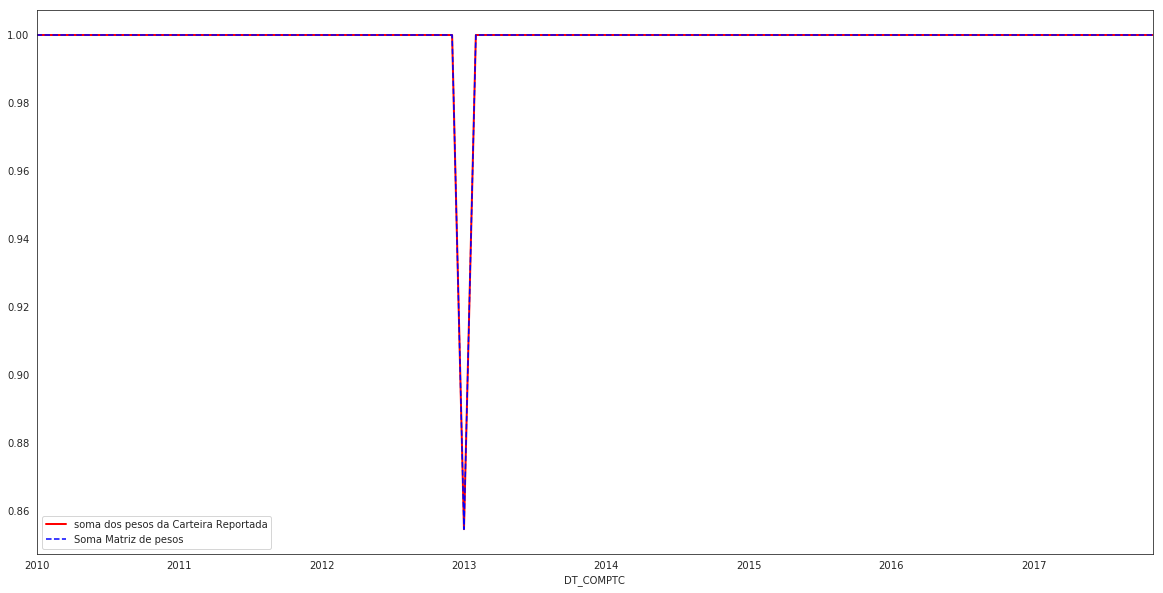

In [31]:
#os ativos somam 1 todos os meses?
q = carteira.groupby('DT_COMPTC').peso.sum()
ax = q.plot(figsize=(20,10), label='soma dos pesos da Carteira Reportada', color='red', lw=2)
pesos.sum(axis=1).plot(ax=ax, color='blue', ls='--', label='Soma Matriz de pesos')
#porque em 31/01/2013 o peso soma só 0.85? Faltam 7MM de patrimônio líquido. operações compromissadas?
ax.legend()

# Filtro de Kalman

In [32]:
del acoes_qry
del titulos_qry
del std_securities_returns
del std_stock_returns
del futuros_qry

In [33]:
measurements = ((cotas - cotas.shift())/cotas).dropna()
measurements = measurements.reindex(index=measurements.index.intersection(pd.date_range(pesos.index.min(), pesos.index.max())))
eom_pesos = pesos.resample('D').bfill().reindex(index=measurements.index).reindex(index=measurements.groupby(pd.Grouper(freq='M')).tail(1).index)
states = eom_pesos.reindex(columns=retornos.columns, index=measurements.index)
signals = retornos.reindex(index=measurements.index.values).fillna(method='pad')#.rolling(5).median()

In [34]:
n_dim = len(states.columns)

from filterpy.kalman import KalmanFilter
from filterpy.common import Saver, inv_diagonal
import tqdm

kf = KalmanFilter(n_dim,2+ n_dim)
kf.F *= 1
kf.P = np.diag([0]*kf.dim_x)
kf.Q *= 0.0025


kf.x = states.iloc[0].fillna(0).values
kf.P = np.zeros(kf.dim_x)

s = Saver(kf)
state_mask = np.zeros(kf.dim_x)
Hs = []
Rs = []
Zs = []
epss = []
for i,dt in tqdm.tqdm_notebook(enumerate(measurements.index), total=len(measurements)):

    if dt in eom_pesos.index:
        state_mask = states.replace(0,np.nan).fillna(method='bfill', limit=1)
        state_mask = state_mask.isnull().mul(1).loc[dt].values
        H = np.vstack([signals.loc[dt].fillna(0).values.reshape(1,kf.dim_x), np.eye(kf.dim_x), np.ones(kf.dim_x)])
        R = np.eye(kf.dim_z)*1e-5
    else:
        #kf.H = np.vstack([signals.loc[dt].fillna(0).values.reshape(1,n_dim), np.diag(state_mask)]).astype(float)
        #kf.R = np.diag(np.hstack([np.array(1e-2), (state_mask * 0.05) + np.finfo(np.double).tiny])).astype(float)
        H = np.vstack([signals.loc[dt].fillna(0).values.reshape(1,kf.dim_x),  np.diag(state_mask), np.ones(kf.dim_x)]).astype(float)
        R = np.eye(kf.dim_z) * 10
        R[0,0] = 1e-5
        R[0,0] = 1e-5
    
    Z = np.hstack([measurements.loc[dt], states.loc[dt].fillna(0), 1])
    kf.H = H
    kf.R = R
    
    kf.predict()
    kf.update(Z)
    
    y, S = kf.y[[0]], kf.S[0,0].reshape(1,1)
    eps = np.dot(y.T, np.linalg.inv(S)).dot(y)
    epss.append(eps)
    
    s.save()
    #Hs.append(H)
    #Rs.append(R)
    #Zs.append(Z)

s.to_array()

In [37]:
## Calcula as matrizes smoothed
from filterpy.kalman import rts_smoother
sx, sP, sK, spP = rts_smoother(s.x, s.P, s.F, s.Q)

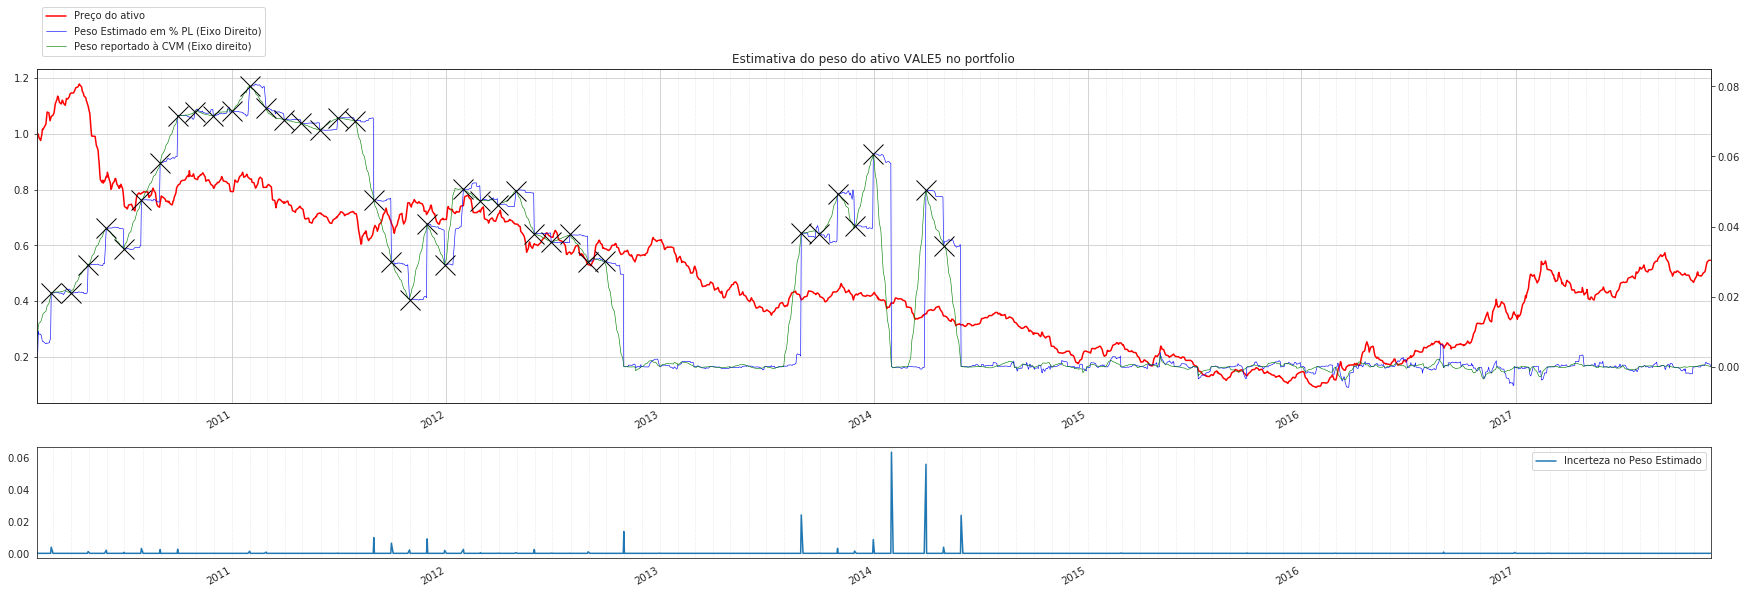

In [39]:
#verifica o ativo 
%matplotlib inline

ativo = 'VALE5'#'ABCB4'

estimativas = pd.DataFrame(s.x, index=measurements.index, columns=signals.columns)
erro_estimativa_ativo = pd.Series(s.y[:,estimativas.columns.get_loc(ativo) +1], index=measurements.index).pow(2).div(s.S[:,estimativas.columns.get_loc(ativo) + 1,estimativas.columns.get_loc(ativo) + 1])

smooth = pd.DataFrame(sx, index=measurements.index, columns=signals.columns)

fig, ax = plt.subplots(2,1, figsize=(30,10), sharex=False, gridspec_kw=dict(height_ratios=[3,1], hspace=0.2), facecolor='white')
estimativas.loc[:,ativo].plot(secondary_y=True, color='Blue', legend='peso', ax=ax[0], lw=.6)
smooth.loc[:,ativo].plot(secondary_y=True, color='Green', legend='peso', ax=ax[0], lw=.6)
states[ativo].dropna().plot(marker='x', linestyle='', color='black', markersize='20', secondary_y=True, ax=ax[0])
signals.loc[:,ativo].rolling(3).median().add(1).cumprod().plot(color='red',ax=ax[0])



import matplotlib.dates as mdates

ax[0].xaxis.set_minor_locator(mdates.MonthLocator())
ax[0].xaxis.set_major_locator(mdates.YearLocator())
ax[0].grid(which='major', linestyle='-')
ax[0].grid(which='minor', linestyle=':', lw=.5)

ax[1].xaxis.set_minor_locator( mdates.MonthLocator())
ax[1].xaxis.set_major_locator(mdates.YearLocator())
ax[1].grid(which='major', linestyle='-')
ax[1].grid(which='minor', linestyle=':', lw=.5)


erro_estimativa_ativo.plot(ax=ax[1])

[t.set_visible(True) for t in ax[0].get_xticklabels()]
ax[0].set_title("Estimativa do peso do ativo {} no portfolio".format(ativo))
handlers = ax[0].get_legend_handles_labels()[0] + ax[0].right_ax.get_legend_handles_labels()[0]
ax[0].legend(handlers, ["Preço do ativo", "Peso Estimado em % PL (Eixo Direito)","Peso reportado à CVM (Eixo direito)"], loc=2, bbox_to_anchor=(0,1.2))
ax[1].legend(ax[1].get_legend_handles_labels()[0], ["Incerteza no Peso Estimado"])

Correlacao 0.9986667052587709


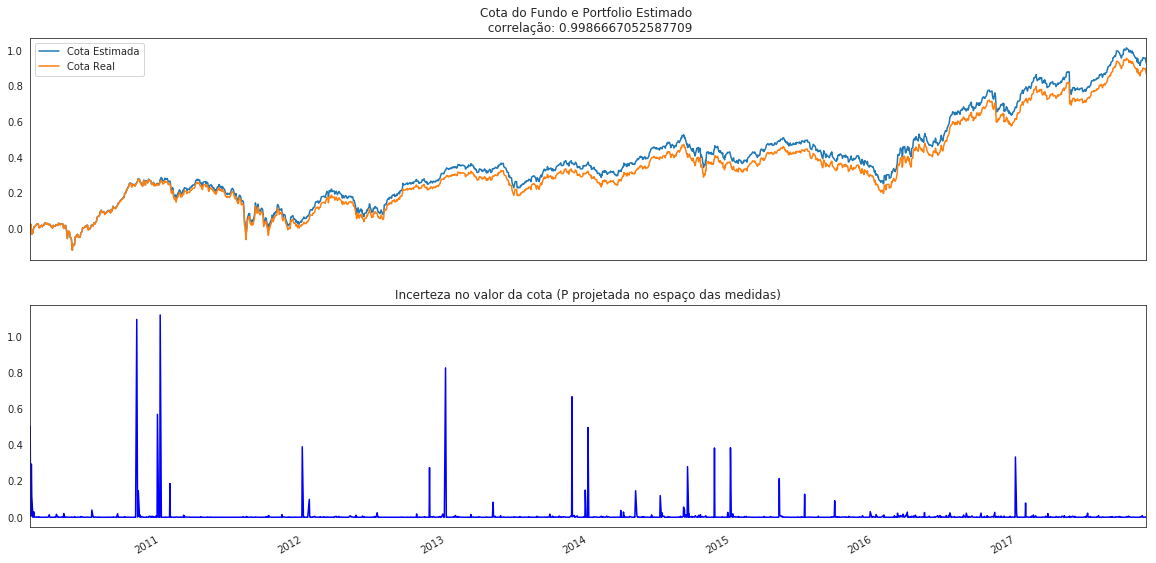

In [40]:
erros = pd.Series(s.y[:,0], index=measurements.index).pow(2).div(s.S[:,0,0])

fig, (axu, axd) = plt.subplots(nrows=2, ncols=1, figsize=(20,10), sharex=True, facecolor='white')
estimativas.mul(signals).sum(1).cumsum().plot(ax=axu)
measurements.cumsum().plot(ax=axu)
erros.plot(color='Blue', secondary_y=False, ax=axd)
print("Correlacao", estimativas.mul(signals).sum(1).corr(measurements))
axu.set_title("Cota do Fundo e Portfolio Estimado \n correlação: {}".format(estimativas.mul(signals).sum(1).corr(measurements)))
axd.set_title("Incerteza no valor da cota (P projetada no espaço das medidas)")
axu.legend(['Cota Estimada','Cota Real'])

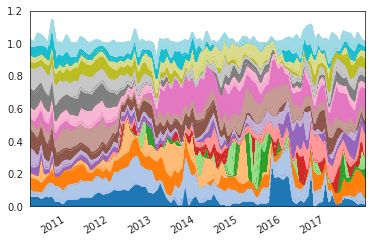

In [59]:
eom_pesos[eom_pesos > 0].plot.area(legend=False, cmap='tab20')

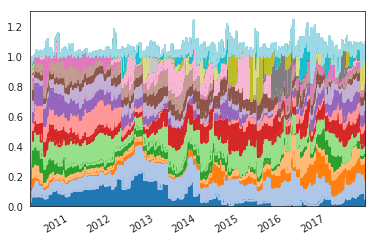

In [60]:
estimativas[estimativas > 0].plot.area(legend=False, cmap='tab20')

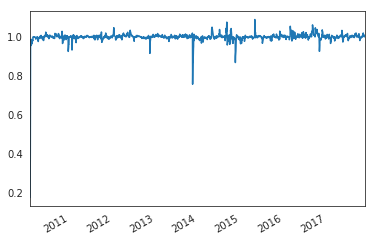

In [212]:
estimativas.sum(1).plot()

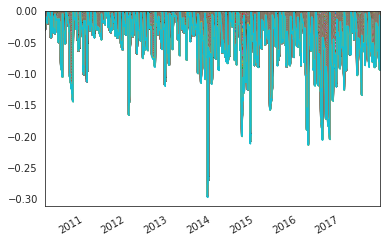

In [190]:
estimativas[estimativas < 0].plot.area(legend=False)

In [ ]:
estimativas[estimativas < 0]